In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [107]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Shows.csv to Netflix Shows (2).csv


считаем полностью данные в датафрейм

In [108]:
data_full = pd.read_csv("/content/Netflix Shows.csv", encoding='cp437')
#del data['ratingDescription'], data['user rating size'] #пока оставим эти два столбца

In [109]:
data_full

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


Посмотрим, сколько у нас пропущенных значений (NaN) в каждом столбце

In [110]:
data_full.isna().sum(axis=0)

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [111]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


посмотрим какие есть значения в столбце 'user rating size' и как по ним распределены строки, для того чтобы понять нужен ли нам этот столбец для дальнейшего анализа

In [112]:
data_full['user rating size'].value_counts()

80    605
82    388
81      7
Name: user rating size, dtype: int64

Удалим из данных дупликаты и неинформативные столбцы:
*   'ratingDescription' (поскольку это просто числовой код значения столбца 'rating'-рейтинг шоу)

In [113]:
data1=data_full.drop_duplicates()
data2=data1.drop(['ratingDescription'],axis=1)
data2.isna().sum(axis=0)

title                  0
rating                 0
ratingLevel           33
release year           0
user rating score    244
user rating size       0
dtype: int64

После удаления дублей осталось 500 записей

In [138]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        500 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
 5   user rating size   500 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 27.3+ KB


посчитаем количество уникальных значений в столбце ratingLevel-99, понимая что там также есть Nan

In [114]:
data2.ratingLevel.nunique()

99

Заменим в этом столбце NaN на 'Not defined'

In [115]:
ratingLevel_filled=data2.ratingLevel.fillna('Not defined')
data2.ratingLevel=data2.ratingLevel.fillna(ratingLevel_filled)


проверим, что теперь в ratingLevel нет NaN (а теперь Not defined)

In [116]:
data2.isna().sum(axis=0)

title                  0
rating                 0
ratingLevel            0
release year           0
user rating score    244
user rating size       0
dtype: int64

Сколько рейтинговых групп представлено в данных?

если считать количество рейтинговых групп только по rating

In [119]:
#data2.rating.nunique() #или так
data2.groupby('rating').ngroups

13

если считать по ratingLevel, то 99 + 1 (Not defined)

In [118]:
data2.ratingLevel.nunique() #или так
#data2.groupby('rating').ngroups

100

если считать количество рейтинговых групп по rating и ratingLevel, то 100, но если учитывать 'Not defined' за отдельную группу, то 105 )))

In [122]:
pd.options.display.max_rows = 20
data3=data2.groupby(['rating','ratingLevel']).count()
data2.groupby(['rating','ratingLevel']).ngroups
data3

title  \
rating   ratingLevel                                                 
G        General Audiences. Suitable for all ages.              52   
         Not defined                                             1   
NR       Not defined                                             3   
         This movie has not been rated.                          7   
PG       Parental guidance suggested. May not be suitabl...     12   
...                                                            ...   
TV-PG    Parental guidance suggested. May not be suitabl...     31   
TV-Y     Suitable for all ages.                                 36   
TV-Y7    Suitable for children ages 7 and older                 23   
TV-Y7-FV Suitable for children ages 7 and older.  Conten...     25   
UR       This movie has not been rated. Intended for adu...      1   

                                                             release year  \
rating   ratingLevel                                                        
G        General Audiences. Suitable for all ages.                     52   
         Not defined                                                    1   
NR       Not defined                                                    3   
         This movie has not been rated.                                 7   
PG       Parental guidance suggested. May not be suitabl...            12   
...                                                                   ...   
TV-PG    Parental guidance suggested. May not be suitabl...            31   
TV-Y     Suitable for all ages.                                        36   
TV-Y7    Suitable for children ages 7 and older                        23   
TV-Y7-FV Suitable for children ages 7 and older.  Conten...            25   
UR       This movie has not been rated. Intended for adu...             1   

                                                             user rating score  \
rating   ratingLevel                                                             
G        General Audiences. Suitable for all ages.                          18   
         Not defined                                                         1   
NR       Not defined                                                         0   
         This movie has not been rated.                                      2   
PG       Parental guidance suggested. May not be suitabl...                  6   
...                                                                        ...   
TV-PG    Parental guidance suggested. May not be suitabl...                 20   
TV-Y     Suitable for all ages.                                              8   
TV-Y7    Suitable for children ages 7 and older                              6   
TV-Y7-FV Suitable for children ages 7 and older.  Conten...                  8   
UR       This movie has not been rated. Intended for adu...                  0   

                                                             user rating size  
rating   ratingLevel                                                           
G        General Audiences. Suitable for all ages.                         52  
         Not defined                                                        1  
NR       Not defined                                                        3  
         This movie has not been rated.                                     7  
PG       Parental guidance suggested. May not be suitabl...                12  
...                                                                       ...  
TV-PG    Parental guidance suggested. May not be suitabl...                31  
TV-Y     Suitable for all ages.                                            36  
TV-Y7    Suitable for children ages 7 and older                            23  
TV-Y7-FV Suitable for children ages 7 and older.  Conten...                25  
UR       This movie has not been rated. Intended for adu...                 1  

[105 rows x 4 columns]

Распределение по rating

In [123]:
data2.rating.value_counts()

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

Распределение по ratingLevel

In [126]:
pd.options.display.max_rows = 150
data2.ratingLevel.value_counts()

Parents strongly cautioned. May be unsuitable for children ages 14 and under.                                                    100
Suitable for all ages.                                                                                                            65
For mature audiences.  May not be suitable for children 17 and under.                                                             60
General Audiences. Suitable for all ages.                                                                                         52
Not defined                                                                                                                       33
Parental guidance suggested. May not be suitable for all children.                                                                31
Suitable for children ages 7 and older.  Content contains fantasy violence.                                                       25
Suitable for children ages 7 and older                               

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [131]:
data3 = data2.groupby('user rating score').size().sort_values(ascending=False)
data3

user rating score
96.0    12
97.0    12
98.0    12
95.0    11
91.0    11
81.0     9
88.0     9
93.0     9
92.0     8
85.0     8
79.0     8
94.0     8
89.0     7
90.0     7
84.0     7
80.0     7
77.0     7
74.0     7
61.0     7
57.0     6
82.0     6
83.0     6
86.0     6
71.0     5
56.0     5
70.0     5
68.0     5
64.0     5
73.0     4
62.0     4
58.0     4
67.0     4
63.0     4
69.0     4
66.0     3
72.0     3
78.0     3
55.0     2
75.0     2
65.0     2
59.0     1
99.0     1
dtype: int64

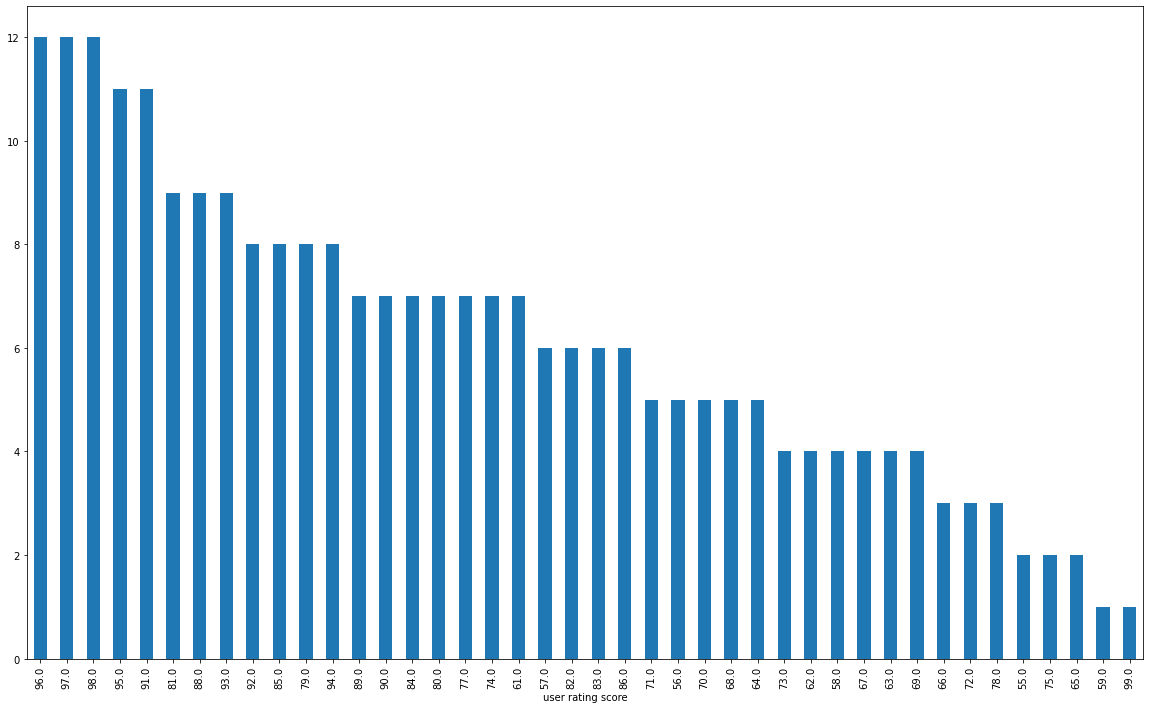

In [143]:
data3.plot(kind='bar', figsize=(20,12))

мы знаем что у нас 244 значения NaN в столбце user rating score

In [132]:
data2.isna().sum(axis=0)

title                  0
rating                 0
ratingLevel            0
release year           0
user rating score    244
user rating size       0
dtype: int64

Заменим Nan на 10.0

In [147]:
data_not_NaN=data2.fillna(0.0)
data_not_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        500 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  500 non-null    float64
 5   user rating size   500 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 27.3+ KB


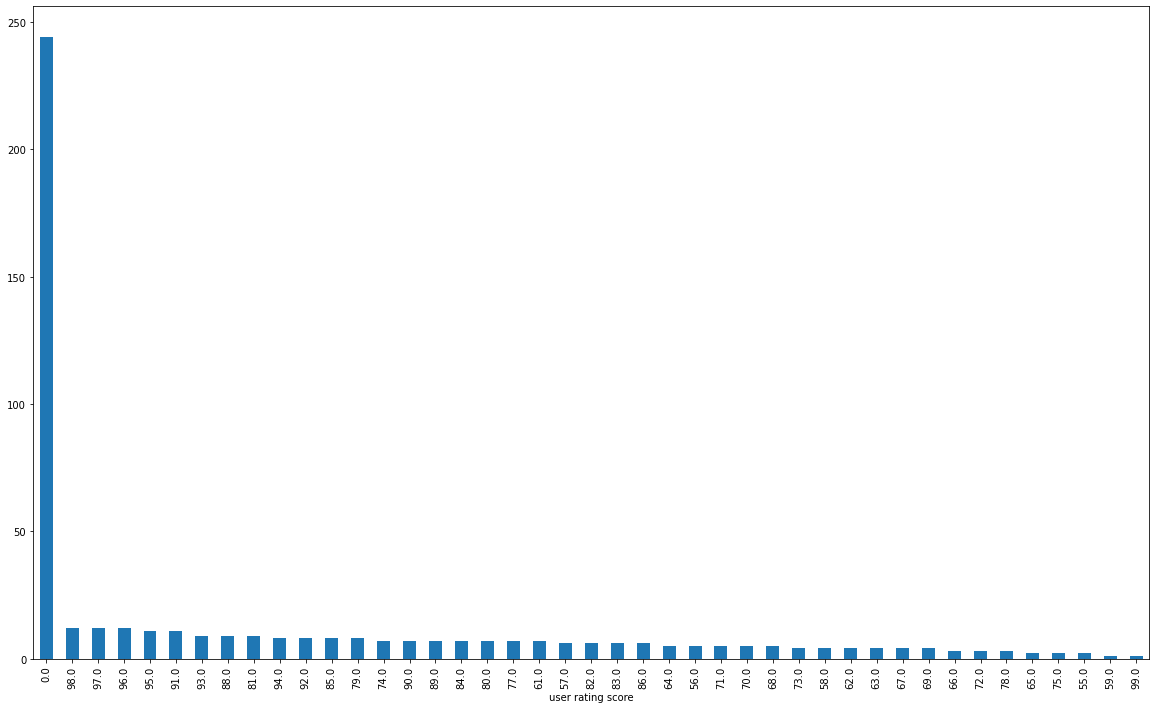

In [148]:
data4=data_not_NaN.groupby('user rating score').size().sort_values(ascending=False)
data4.plot(kind='bar', figsize=(20,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27645576d0>]],
      dtype=object)

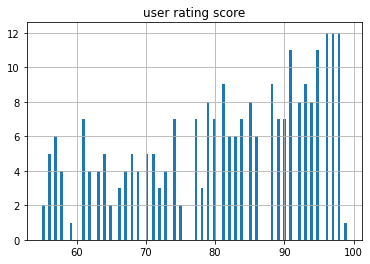

In [149]:
data2.hist('user rating score', bins = 100, rwidth= .9)


посчитаем статистики

In [150]:
data2['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

***Вывод:*** Чаще всего ставят 96-98

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

***Ответ:*** Судя по графику, у нас нет выбросов, поэтому медиана и среднее не сильно отличаются

В какие годы были запущены шоу, представленные в датасете?

In [151]:
data2['release year'].unique()

array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

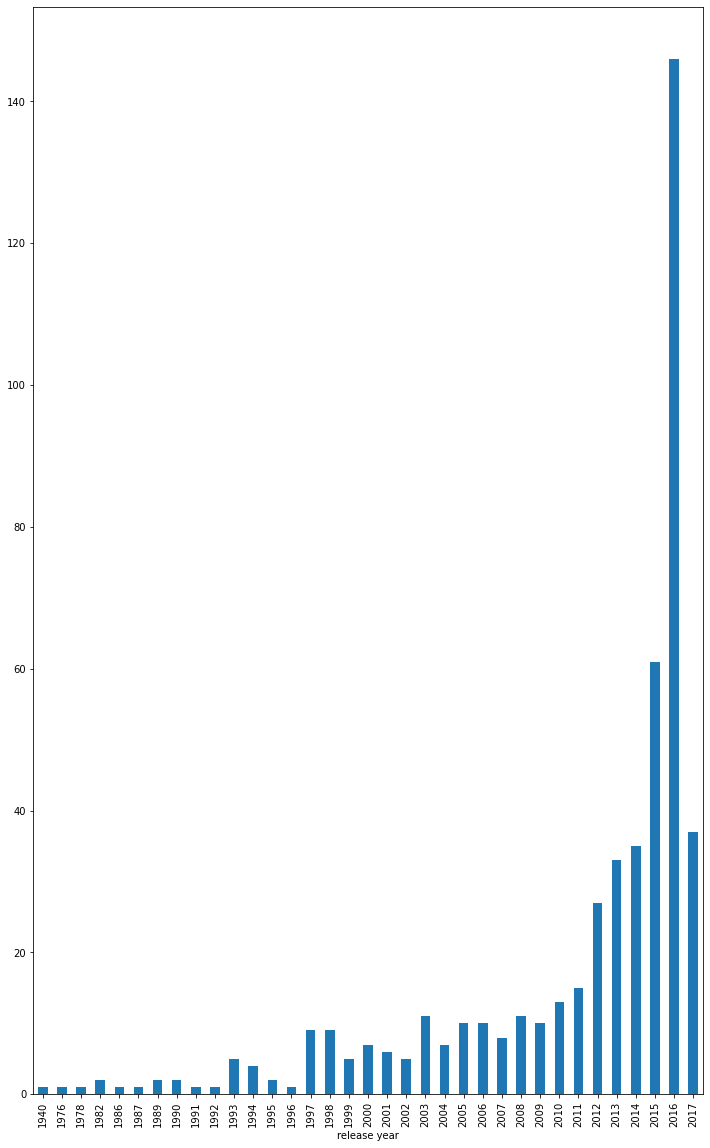

In [153]:
year_show_count = data2.groupby('release year')['title'].count()
year_show_count.plot(kind='bar', figsize=(12,20))

Теперь посмотрим на выброс.

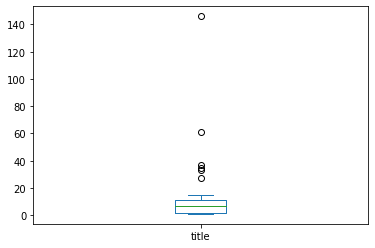

In [160]:
year_show_count.plot(kind='box')

*** *Курсив*Вывод:*** Выброс в 2016 году 

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



посчитаем кол-во оценок, среднее и медиану для 2016 и 2017 годов

In [183]:
data11=data2.groupby('release year')['user rating score'].agg(['count','mean','median'])
data11.loc[2016:2017]

,count,mean,median
release year,,,
2016,86,84.313953,89.0
2017,16,88.125000,90.5


А теперь рассмотрим тоже самое только где NaN заменен на ноль

In [182]:
data12=data_not_NaN.groupby('release year')['user rating score'].agg(['count','mean','median'])
data12.loc[2016:2017]

,count,mean,median
release year,,,
2016,146,49.664384,69.0
2017,37,38.108108,0.0


***Вывод:*** Основываясь на показателе оценки пользователей нельзя сказать успешнее ли был 2016\2017 год из-за большого кол-ва пропусков оценок в эти года

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [202]:
def label_function(val):
    return f'{val:.2f}%'

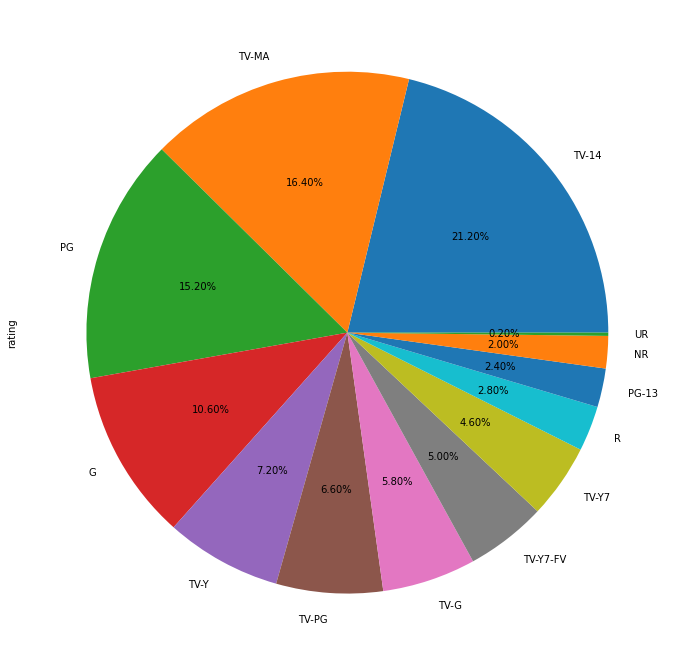

In [203]:
s=data2.rating.value_counts()
s.plot(kind='pie', autopct=label_function,figsize=(20, 12))

***Вывод:*** Долю в 21.2% среди шоу занимает группа TV-14

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [206]:
data2.loc[data2['user rating score'].nsmallest(5).index]

,title,rating,ratingLevel,release year,user rating score,user rating size
207,Life Unexpected,TV-PG,Parental guidance suggested. May not be suitab...,2010,55.0,80
710,Curious George,G,General Audiences. Suitable for all ages.,2006,55.0,80
253,How to Lose a Guy in 10 Days,PG-13,some sex-related material,2003,56.0,80
259,Hannah Montana: The Movie,G,General Audiences. Suitable for all ages.,2009,56.0,80
380,Bitten,TV-MA,For mature audiences. May not be suitable for...,2016,56.0,80


In [207]:
data2.loc[data2['user rating score'].nlargest(5).index]

,title,rating,ratingLevel,release year,user rating score,user rating size
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0,80
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0,80


Найдем среднюю оценку среди всех

In [209]:
data2['user rating score'].mean()

81.3984375

Список шоу с оценкой 81 как ниболее близкой к средней

In [219]:
data2[data2['user rating score']==81.0]

,title,rating,ratingLevel,release year,user rating score,user rating size
20,Masha and the Bear,TV-Y,Suitable for all ages.,2013,81.0,80
65,The Secret Life of the American Teenager,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,81.0,80
223,Sense8,TV-MA,For mature audiences. May not be suitable for...,2017,81.0,80
261,Friday Night Lights,TV-PG,Parental guidance suggested. May not be suitab...,2010,81.0,80
283,Hart of Dixie,TV-PG,Parental guidance suggested. May not be suitab...,2014,81.0,80
443,Rosewood,TV-14,Parents strongly cautioned. May be unsuitable ...,2015,81.0,80
670,The Magic School Bus,TV-Y,Suitable for all ages.,1997,81.0,80
700,Cool Runnings,PG,Parental guidance suggested. May not be suitab...,1993,81.0,80
754,The Prince of Egypt,PG,intense scenes dealing with strong content,1998,81.0,80


In [222]:
data2[data2.title=='The Magic School Bus']

,title,rating,ratingLevel,release year,user rating score,user rating size
670,The Magic School Bus,TV-Y,Suitable for all ages.,1997,81.0,80


***Вывод:*** Выбрав шоу The Magic School Bus 1997 года из списка шоу с оценками близкими к средней (а именно =81), ничего особенно сказать нельзя. С такими же оценками есть шоу 1993 и 2017 годов, однако из 9 *таких* шоу, лишь 2 без ограничения по возрасту